In [1]:
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from time import sleep
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
from pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser
import sys
sys.path.append('../utilities/')

from graph_helpers import hello_world


%matplotlib inline

PICKLE_PATH='/home/bjohnson/rdb/output/ubiad1_blastmsa.db'

In [2]:
Dseq = list(); Dsca = list(); Dsect = list()
db = pickle.load(open(PICKLE_PATH,'rb'))
command = 'scaSectorID -i %s' % (PICKLE_PATH)
call(command, shell = 'True')

# Load and store results of scaSectorID
db = pickle.load(open(PICKLE_PATH,'rb'))

Selected kpos=325 significant eigenmodes.


Error: basicICA overflow encountered in exp


In [5]:
Dseq.append(db['sequence'])
Dsca.append(db['sca'])
# Dsect.append(db['sector'])
N_alg = 2
AlgName = ['PFAM', 'Manual']

(0.0, 4.0)

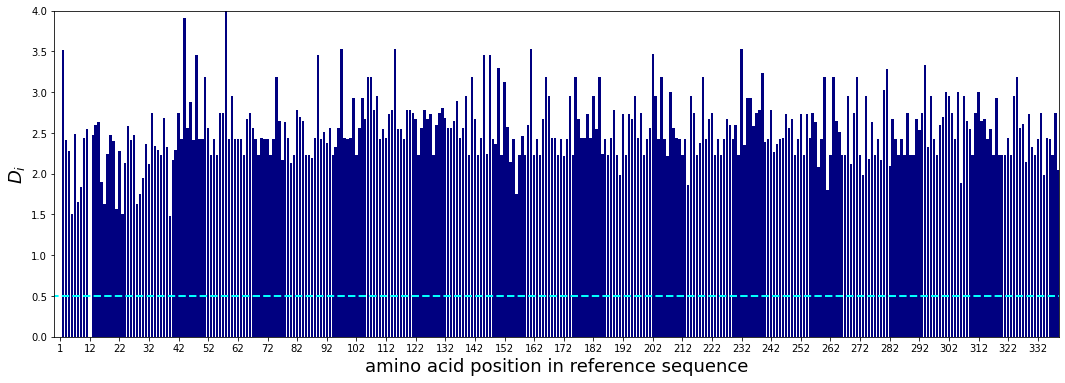

In [6]:
plt.rcParams['figure.figsize'] = 18,6
y = Dsca[0]['Di']
x = Dseq[0]['ats']
plt.bar(x,y,color = 'navy',edgecolor = 'none')

plt.xlabel('amino acid position in reference sequence',fontsize=18)
plt.ylabel('$D_{i}$',fontsize=18)

#X labels for subset of positions. Needed to do this otherwise, the figure is too crowded. 
xticklocations = np.arange(0,len(x),10) 
xtickPosLabels = [Dseq[0]['ats'][a] for a in xticklocations]
plt.xticks(xticklocations,xtickPosLabels)

#Plots threshold for Di in cyan. Should see some positions where it drops below 0.5 for a sufficient diversity across positions. 
plt.plot([-10,len(Dseq[0]['ats'])+10],[0.5,0.5],'--',color = 'cyan',linewidth = 2)

#Set min and max axes of figure 
plt.xlim(-2, len(Dseq[0]['ats']))
plt.ylim(0,4)

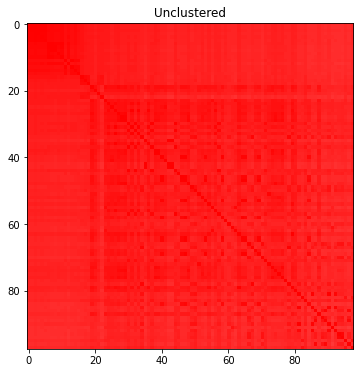

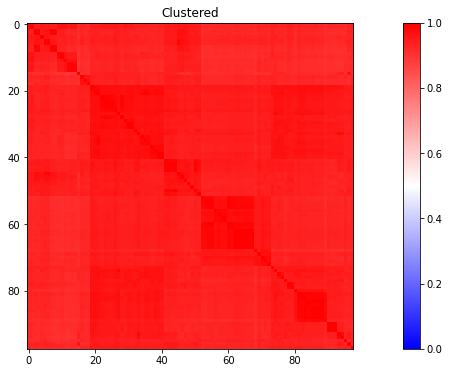

In [7]:
# Cluster the similarity matrix
Z = sch.linkage(Dsca[0]['simMat'],method = 'complete', metric = 'cityblock')
R = sch.dendrogram(Z,no_plot = True)
ind = R['leaves']

plt.figure()
plt.title('Unclustered')
plt.imshow(Dsca[0]['simMat'],interpolation = 'nearest',cmap = 'bwr',vmin = 0,vmax = 1) 

# This doesn't tell you anything. You need to cluster this matrix. 
plt.figure()
plt.title('Clustered')
plt.imshow(Dsca[0]['simMat'][np.ix_(ind,ind)],vmin = 0,vmax = 1, cmap = 'bwr',interpolation = 'nearest')
plt.colorbar()
